In [10]:
import os,sys, pathlib, time, subprocess
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import re
from pathlib import Path
from scipy.interpolate import UnivariateSpline



folder_path = pathlib.Path().resolve()
planing_path = folder_path.parent.parent
problem_path = folder_path / "Problemas"
print("Current folder path:", folder_path)
print("Planing folder path:", planing_path)
print("Problem folder path:", problem_path)

sizes = []
times = []
steps = []
step_pattern = re.compile(r"\s*\d+\s*:")





Current folder path: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1
Planing folder path: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani
Problem folder path: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1/Problemas


# FF

In [11]:

max_time = 60  # Tiempo máximo en segundos para cada resolución
size = 2
time_exceeded = False
max_size = 0


if not problem_path.exists():
    os.makedirs(problem_path)

pbar = tqdm(desc="Resolviendo tamaños", unit="problema", position=0, leave=True)
while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    # Generar el problema con los parámetros actuales
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -r 1 -l {size} -p {size} -c {size} -g {size} -v 0"
    # pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)
    pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]
    planificador_cmd = [
        f"{planing_path}/planificadores/ff",
        "-o", f"{folder_path}/dron-domain.pddl",
        "-f", str(problem_pddl)
    ]
    start = time.time()
    try:
        result = subprocess.run(planificador_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start
        if result.returncode == 0:
            max_size = size
            sizes.append(size)
            times.append(elapsed)
            result_lines = result.stdout.splitlines()
            step_count = 1
            for line in result.stdout.splitlines():
                if step_pattern.match(line):
                    step_count += 1
            steps.append(step_count)
            
            pbar.write(f"[OK] Plan encontrado para tamaño {size} en {elapsed:.4f} segundos con {step_count} pasos.")
            pbar.set_postfix({"Tiempo": f"{elapsed:.2f}s", "Tamaño": size})
            size += 1
            pbar.update(1)
        else:
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Tiempo excedido ({max_time}s) para tamaño {size}.")
        time_exceeded = True
        
    os.remove(problem_pddl)

pbar.close()
print(f"\n>>> El mayor tamaño resuelto en menos de 1 minuto es: {max_size}")



Resolviendo tamaños: 0problema [00:00, ?problema/s]

[OK] Plan encontrado para tamaño 2 en 0.0029 segundos con 8 pasos.
[OK] Plan encontrado para tamaño 3 en 0.0039 segundos con 12 pasos.
[OK] Plan encontrado para tamaño 4 en 0.0045 segundos con 16 pasos.
[OK] Plan encontrado para tamaño 5 en 0.0066 segundos con 20 pasos.
[OK] Plan encontrado para tamaño 6 en 0.0110 segundos con 24 pasos.
[OK] Plan encontrado para tamaño 7 en 0.0258 segundos con 28 pasos.
[OK] Plan encontrado para tamaño 8 en 0.0432 segundos con 32 pasos.
[OK] Plan encontrado para tamaño 9 en 0.0705 segundos con 36 pasos.
[OK] Plan encontrado para tamaño 10 en 0.1328 segundos con 40 pasos.
[OK] Plan encontrado para tamaño 11 en 0.1175 segundos con 44 pasos.
[OK] Plan encontrado para tamaño 12 en 0.2826 segundos con 48 pasos.
[OK] Plan encontrado para tamaño 13 en 0.2748 segundos con 52 pasos.
[OK] Plan encontrado para tamaño 14 en 0.5544 segundos con 56 pasos.
[OK] Plan encontrado para tamaño 15 en 0.5934 segundos con 60 pasos.
[OK] Plan encontrado para tamaño 16 en 0.98

In [12]:
max_time = 60  # Tiempo máximo en segundos para cada resolución
size = max_size + 1  # Comenzar desde el tamaño máximo encontrado
time_exceeded = False

if not problem_path.exists():
    os.makedirs(problem_path)

pbar = tqdm(desc="Resolviendo tamaños", unit="problema", position=0, leave=True)
while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    # Generar el problema con los parámetros actuales
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -r 1 -l {size} -p {size} -c {size} -g {size} -v 0"
    # pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)
    pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]
    planificador_cmd = [
        f"{planing_path}/planificadores/ff",
        "-o", f"{folder_path}/dron-domain.pddl",
        "-f", str(problem_pddl)
    ]
    # print(f"[INFO] Ejecutando planificador con comando: {' '.join(planificador_cmd)}")
    start = time.time()
    try:
        result = subprocess.run(planificador_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start
        if result.returncode == 0:
            max_size = size
            sizes.append(size)
            times.append(elapsed)
            result_lines = result.stdout.splitlines()
            step_count = 1
            for line in result.stdout.splitlines():
                if step_pattern.match(line):
                    step_count += 1
            steps.append(step_count)
            
            pbar.write(f"[OK] Plan encontrado para tamaño {size} en {elapsed:.4f} segundos con {step_count} pasos.")
            pbar.set_postfix({"Tiempo": f"{elapsed:.2f}s", "Tamaño": size})
            size += 1
            pbar.update(1)
        else:
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Tiempo excedido ({max_time}s) para tamaño {size}.")
        time_exceeded = True
        

pbar.close()
print(f"\n>>> El mayor tamaño resuelto en menos de 1 minuto es: {max_size}")


Resolviendo tamaños: 0problema [00:00, ?problema/s]

[TIMEOUT] Tiempo excedido (60s) para tamaño 36.

>>> El mayor tamaño resuelto en menos de 1 minuto es: 35


In [13]:
results_csv_path = folder_path / "Resultados/resultadosff.csv"
if not results_csv_path.parent.exists():
    os.makedirs(results_csv_path.parent)
    
new_df = pd.DataFrame({'Tamaño': sizes, 'Tiempo (s)': times, 'Pasos': steps})

if results_csv_path.exists():
    old_df = pd.read_csv(results_csv_path)
    combined_df = pd.concat([old_df, new_df], ignore_index=True)

    # Calcular la media de tiempo por tamaño
    tiempo_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()

    # Obtener el máximo de pasos por tamaño
    pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()

    # Unir ambos resultados en un solo DataFrame
    final_df = tiempo_df.merge(pasos_df, on='Tamaño')
else:
    final_df = new_df

final_df.to_csv(results_csv_path, index=False)
print(f"Resultados exportados a {results_csv_path}")


Resultados exportados a /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1/Resultados/resultadosff.csv


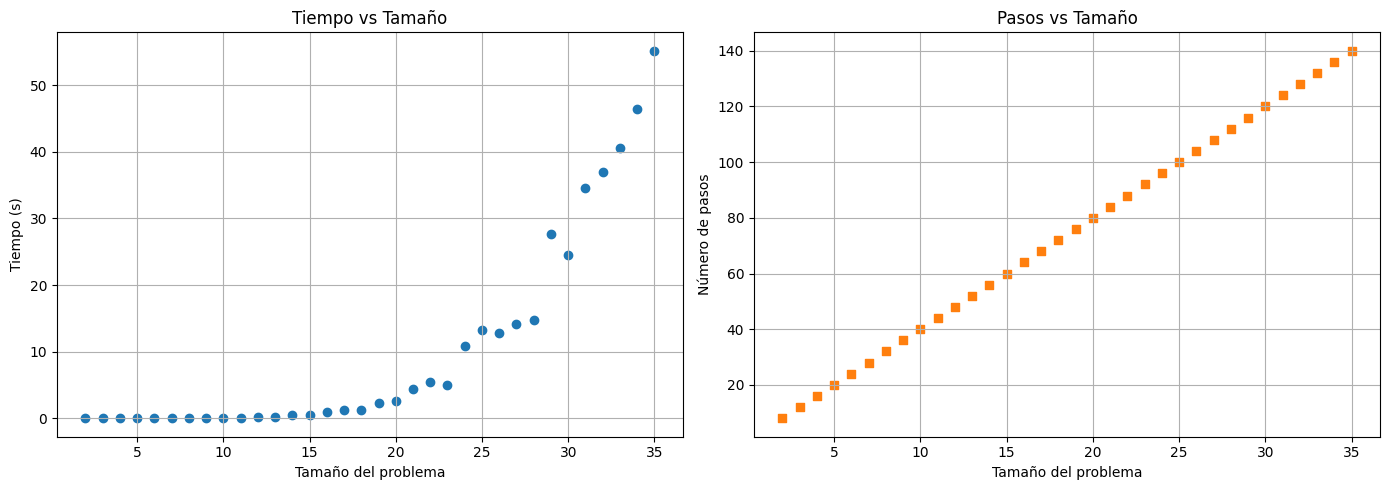

In [14]:
# Cargar los datos desde el archivo CSV exportado
results = pd.read_csv(folder_path / "Resultados/resultadosff.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']
steps = results['Pasos']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tiempo vs Tamaño (sin líneas entre puntos)
axs[0].scatter(sizes, times, marker='o', color='tab:blue')


axs[0].set_xlabel('Tamaño del problema')
axs[0].set_ylabel('Tiempo (s)')
axs[0].set_title('Tiempo vs Tamaño')
axs[0].grid(True)

# Gráfico 2: Pasos vs Tamaño (sin líneas entre puntos)
axs[1].scatter(sizes, steps, marker='s', color='tab:orange')

axs[1].set_xlabel('Tamaño del problema')
axs[1].set_ylabel('Número de pasos')
axs[1].set_title('Pasos vs Tamaño')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# LPG-TD

In [15]:
planner_name = "LPG-TD"
planner_cmd = [
    f"{planing_path}/planificadores/lpg-td",
    "-n", "1",
    "-o", f"{folder_path}/dron-domain.pddl"
]

max_time = 60
max_size = 0
sizes = []
times = []
steps_list = []
outputs = []

size = 2
time_exceeded = False

pbar = tqdm(desc="Resolviendo tamaño", unit="problema", position=0, leave=True)

while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    pbar.refresh()

    # Generar el problema PDDL de tamaño `size`
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -r 1 -l {size} -p {size} -c {size} -g {size} -v 0"

    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)

    pddl_files = sorted(
        problem_path.glob("*.pddl"),
        key=os.path.getmtime,
        reverse=True
    )
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]

    full_cmd = planner_cmd + ["-f", str(problem_pddl)]
    pbar.write(f"[INFO] Ejecutando planificador {planner_name} para tamaño {size}...")

    start = time.time()
    try:
        result = subprocess.run(full_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start

        if result.returncode == 0:
            plan_output = result.stdout
            # Contar líneas válidas de plan (ignorando comentarios)
            num_steps = sum(
                1
                for line in plan_output.strip().split("\n")
                if line.strip() and not line.startswith(";") and "(" in line
            )

            sizes.append(size)
            times.append(elapsed)
            steps_list.append(num_steps)
            outputs.append(plan_output[:500])  # guardar solo primeros 500 caracteres
            max_size = size
        else:
            pbar.write(f"[ERROR] Planificador {planner_name} falló para tamaño {size}.")
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Planificador {planner_name} excedió tiempo para tamaño {size}.")
        time_exceeded = True

    os.remove(problem_pddl)
    pbar.update(1)
    size += 1

pbar.close()

print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Resultados/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])


Resolviendo tamaño: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[INFO] Ejecutando planificador LPG-TD para tamaño 2...

[INFO] Generando problema para tamaño 3...
[INFO] Ejecutando planificador LPG-TD para tamaño 3...

[INFO] Generando problema para tamaño 4...
[INFO] Ejecutando planificador LPG-TD para tamaño 4...

[INFO] Generando problema para tamaño 5...
[INFO] Ejecutando planificador LPG-TD para tamaño 5...

[INFO] Generando problema para tamaño 6...
[INFO] Ejecutando planificador LPG-TD para tamaño 6...

[INFO] Generando problema para tamaño 7...
[INFO] Ejecutando planificador LPG-TD para tamaño 7...

[INFO] Generando problema para tamaño 8...
[INFO] Ejecutando planificador LPG-TD para tamaño 8...

[INFO] Generando problema para tamaño 9...
[INFO] Ejecutando planificador LPG-TD para tamaño 9...

[INFO] Generando problema para tamaño 10...
[INFO] Ejecutando planificador LPG-TD para tamaño 10...

[INFO] Generando problema para tamaño 11...
[INFO] Ejecutando planificador LPG-TD para tamaño 11...

[INFO

,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.092220,11,LPG-TD
1,3,0.084754,15,LPG-TD
2,4,0.078921,20,LPG-TD
3,5,0.094983,24,LPG-TD
4,6,0.101359,29,LPG-TD
5,7,0.101626,32,LPG-TD
6,8,0.102836,37,LPG-TD
7,9,0.104836,40,LPG-TD
8,10,11.675023,45,LPG-TD
9,11,2.425035,52,LPG-TD



Salida fragmento para LPG-TD tamaño 32:



NUMERIC_THREATS_MODE: 0

; Command line: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/planificadores/lpg-td -n 1 -o /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1/dron-domain.pddl -f /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1/Problemas/drone_problem_d1_r1_l32_p32_c32_g32_ct2.pddl   


Parsing domain file:  domain 'DRONE-DOMAIN' defined ... done.
Parsing problem file:  problem 'DRONE_PROBLEM_D1_R1_L32_P32_C32_G32_CT2'


In [16]:
print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Resultados/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])


=== Resumen de resultados ===

Tamaño máximo resuelto por LPG-TD: 32
Resultados de LPG-TD exportados a /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1/Resultados/resultados_lpg-td.csv


,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.092220,11,LPG-TD
1,3,0.084754,15,LPG-TD
2,4,0.078921,20,LPG-TD
3,5,0.094983,24,LPG-TD
4,6,0.101359,29,LPG-TD
5,7,0.101626,32,LPG-TD
6,8,0.102836,37,LPG-TD
7,9,0.104836,40,LPG-TD
8,10,11.675023,45,LPG-TD
9,11,2.425035,52,LPG-TD



Salida fragmento para LPG-TD tamaño 32:



NUMERIC_THREATS_MODE: 0

; Command line: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/planificadores/lpg-td -n 1 -o /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1/dron-domain.pddl -f /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio2/2_1/Problemas/drone_problem_d1_r1_l32_p32_c32_g32_ct2.pddl   


Parsing domain file:  domain 'DRONE-DOMAIN' defined ... done.
Parsing problem file:  problem 'DRONE_PROBLEM_D1_R1_L32_P32_C32_G32_CT2'


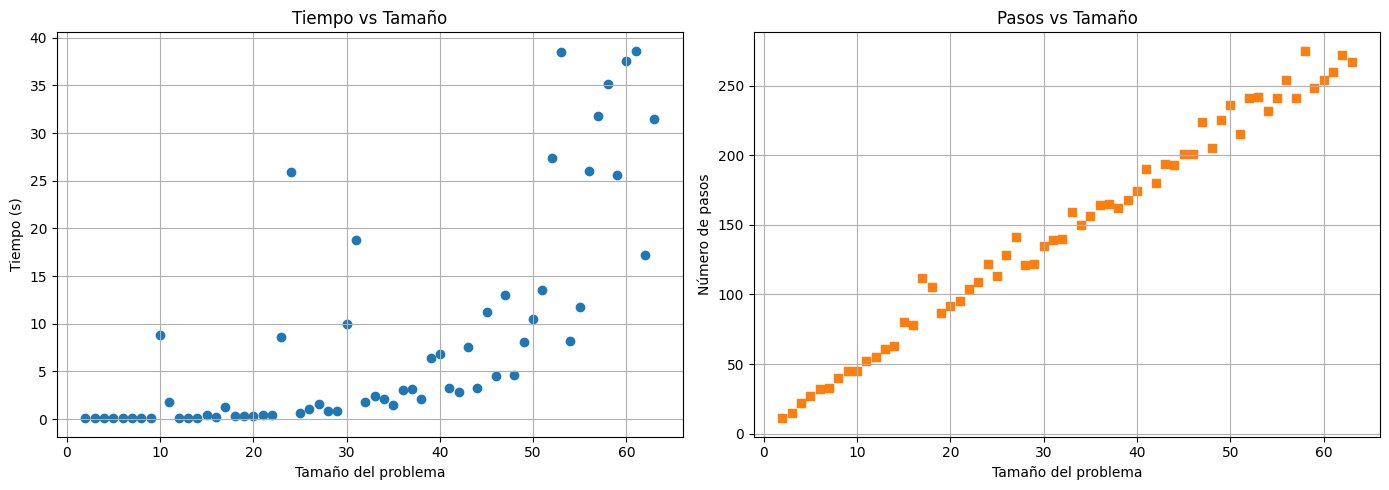

In [17]:
# Cargar los datos desde el archivo CSV exportado
results = pd.read_csv(folder_path / "Resultados/resultados_lpg-td.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']
steps = results['Pasos']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tiempo vs Tamaño (sin líneas entre puntos)
axs[0].scatter(sizes, times, marker='o', color='tab:blue')


axs[0].set_xlabel('Tamaño del problema')
axs[0].set_ylabel('Tiempo (s)')
axs[0].set_title('Tiempo vs Tamaño')
axs[0].grid(True)

# Gráfico 2: Pasos vs Tamaño (sin líneas entre puntos)
axs[1].scatter(sizes, steps, marker='s', color='tab:orange')

axs[1].set_xlabel('Tamaño del problema')
axs[1].set_ylabel('Número de pasos')
axs[1].set_title('Pasos vs Tamaño')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# SGPLAN40

In [18]:
planner_name = "SGPLAN40"
planner_cmd = [
    f"{planing_path}/planificadores/sgplan40",
    "-o", f"{folder_path}/dron-domain.pddl"
]

max_time = 60
max_size = 0
sizes = []
times = []
steps_list = []
outputs = []

size = 2
time_exceeded = False

pbar = tqdm(desc="Resolviendo tamaño", unit="problema", position=0, leave=True)

while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    pbar.refresh()

    # Generar el problema PDDL de tamaño `size`
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -r 1 -l {size} -p {size} -c {size} -g {size} -v 0"

    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)

    pddl_files = sorted(
        problem_path.glob("*.pddl"),
        key=os.path.getmtime,
        reverse=True
    )
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]

    full_cmd = planner_cmd + ["-f", str(problem_pddl)]
    pbar.write(f"[INFO] Ejecutando planificador {planner_name} para tamaño {size}...")

    start = time.time()
    try:
        result = subprocess.run(full_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start

        if result.returncode == 0:
            sizes.append(size)
            times.append(elapsed)
            steps_list.append(num_steps)
            max_size = size
        else:
            pbar.write(f"[ERROR] Planificador {planner_name} falló para tamaño {size}.")
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Planificador {planner_name} excedió tiempo para tamaño {size}.")
        time_exceeded = True

    os.remove(problem_pddl)
    pbar.update(1)
    size += 1

pbar.close()

print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Resultados/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])
# Mostrar resultados finales
print("\n=== Resultados finales ===\n")


Resolviendo tamaño: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 2...

[INFO] Generando problema para tamaño 3...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 3...

[INFO] Generando problema para tamaño 4...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 4...

[INFO] Generando problema para tamaño 5...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 5...

[INFO] Generando problema para tamaño 6...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 6...

[INFO] Generando problema para tamaño 7...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 7...

[INFO] Generando problema para tamaño 8...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 8...

[INFO] Generando problema para tamaño 9...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 9...

[INFO] Generando problema para tamaño 10...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 10...

[INFO] Generando problema para tamaño 11...
[INFO] Ejecutando planificador SGPLAN40 para

,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.002485,140,SGPLAN40
1,3,0.002768,140,SGPLAN40
2,4,0.003316,140,SGPLAN40
3,5,0.003601,140,SGPLAN40
4,6,0.004611,140,SGPLAN40
...,...,...,...,...
76,78,28.979007,140,SGPLAN40
77,79,32.576287,140,SGPLAN40
78,80,35.037354,140,SGPLAN40
79,81,41.953249,140,SGPLAN40



=== Resultados finales ===



In [19]:
# Expresión regular para encontrar archivos con el patrón solicitado
soln_pattern = re.compile(r"drone_problem_d1_r1_l(\d+)_p\1_c\1_g\1_ct2\.pddl\.soln$")
step_line_pattern = re.compile(r"^\d+\.\d+:")  # líneas que empiezan por un decimal y dos puntos

# Leer el CSV existente
df_csv = pd.read_csv(csv_path)

# Crear un diccionario Tamaño -> índice en el DataFrame
size_to_idx = {row['Tamaño']: idx for idx, row in df_csv.iterrows()}
# Borra los valores de la columna 'Pasos' para evitar duplicados
df_csv['Pasos'] = None

# Recorrer archivos en el directorio
for file in os.listdir(folder_path):
    match = soln_pattern.match(file)
    if match:
        size = int(match.group(1))
        file_path = folder_path / file
        with open(file_path, "r") as f:
            file_content = f.read()
            step_count = sum(
                1 for line in file_content.splitlines()
                if line.strip() and not line.strip().startswith(";") and "(" in line
            )
            print(file_content)
            print(step_count)
        # Añadir/actualizar la columna 'Pasos' en el DataFrame
        if size in size_to_idx:
            df_csv.at[size_to_idx[size], 'Pasos'] = step_count
        else:
            # Si no existe la fila, opcionalmente agregarla
            df_csv = pd.concat([df_csv, pd.DataFrame([{'Tamaño': size, 'Pasos': step_count}])], ignore_index=True)

# Guardar el CSV actualizado
df_csv.to_csv(csv_path, index=False)
print(f"Actualizado el número de pasos en {csv_path}")

#delete all .soln files
soln_files = folder_path.glob("*.soln")
for soln_file in soln_files:
    try:
        os.remove(soln_file)
        print(f"[INFO] Eliminado archivo solución: {soln_file}")
    except Exception as e:
        print(f"[ERROR] No se pudo eliminar {soln_file}: {e}")



; Time 10.87
; ParsingTime 0.00
; NrActions 316
; MakeSpan
; MetricValue

	 0.010:  (CARGAR_DRON DRON1 CRATE4 DEPOSITO)[0.000]
	 0.020:  (MOVER-DRON DRON1 DEPOSITO LOC60)[0.000]
	 0.030:  (MOVER-DRON DRON1 LOC60 LOC65)[0.000]
	 0.040:  (ENTREGAR PERSON12 CRATE4 COMIDA LOC65 DRON1)[0.000]
	 0.050:  (MOVER-DRON DRON1 LOC65 DEPOSITO)[0.000]
	 0.060:  (CARGAR_DRON DRON1 CRATE3 DEPOSITO)[0.000]
	 0.070:  (MOVER-DRON DRON1 DEPOSITO LOC60)[0.000]
	 0.080:  (MOVER-DRON DRON1 LOC60 LOC61)[0.000]
	 0.090:  (ENTREGAR PERSON43 CRATE3 COMIDA LOC61 DRON1)[0.000]
	 0.100:  (MOVER-DRON DRON1 LOC61 DEPOSITO)[0.000]
	 0.110:  (CARGAR_DRON DRON1 CRATE2 DEPOSITO)[0.000]
	 0.120:  (MOVER-DRON DRON1 DEPOSITO LOC60)[0.000]
	 0.130:  (MOVER-DRON DRON1 LOC60 LOC63)[0.000]
	 0.140:  (ENTREGAR PERSON48 CRATE2 COMIDA LOC63 DRON1)[0.000]
	 0.150:  (MOVER-DRON DRON1 LOC63 DEPOSITO)[0.000]
	 0.160:  (CARGAR_DRON DRON1 CRATE1 DEPOSITO)[0.000]
	 0.170:  (MOVER-DRON DRON1 DEPOSITO LOC60)[0.000]
	 0.180:  (MOVER-DRON D

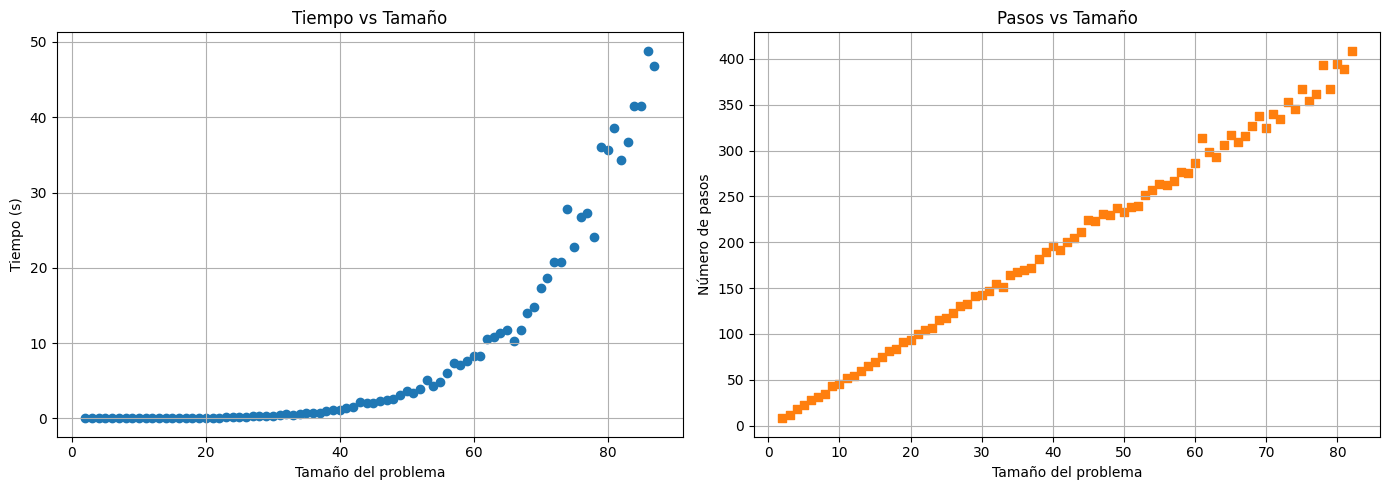

In [20]:
# Cargar resultados
results = pd.read_csv(folder_path / "Resultados/resultados_sgplan40.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']
steps = results['Pasos']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tiempo vs Tamaño (sin líneas entre puntos)
axs[0].scatter(sizes, times, marker='o', color='tab:blue')


axs[0].set_xlabel('Tamaño del problema')
axs[0].set_ylabel('Tiempo (s)')
axs[0].set_title('Tiempo vs Tamaño')
axs[0].grid(True)

# Gráfico 2: Pasos vs Tamaño (sin líneas entre puntos)
axs[1].scatter(sizes, steps, marker='s', color='tab:orange')

axs[1].set_xlabel('Tamaño del problema')
axs[1].set_ylabel('Número de pasos')
axs[1].set_title('Pasos vs Tamaño')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# Resultados Finales

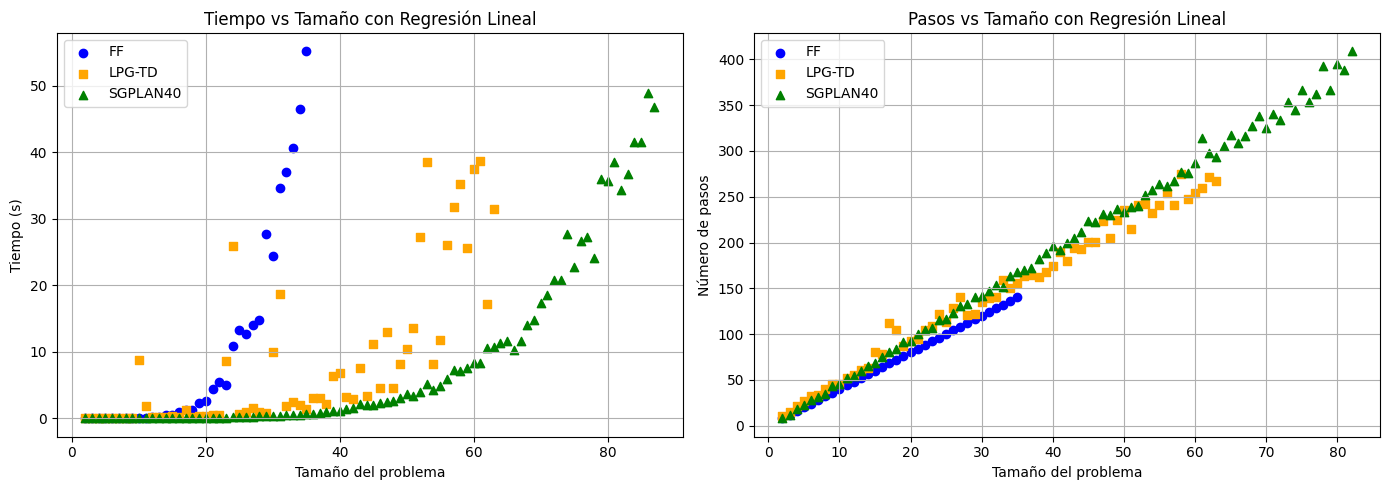


Análisis Estadístico Comparativo

=== Estadísticas para FF ===


,Métrica,Tamaño,Tiempo (s),Pasos
0,Media,18.5,10.50,74.0
1,Mediana,18.5,1.79,74.0
2,Desviación Std,10.0,15.57,39.8
3,Mínimo,2.0,0.00,8.0
4,Máximo,35.0,55.18,140.0



=== Estadísticas para LPG-TD ===


,Métrica,Tamaño,Tiempo (s),Pasos
0,Media,32.5,8.47,147.0
1,Mediana,32.5,2.96,145.5
2,Desviación Std,18.0,11.42,77.2
3,Mínimo,2.0,0.08,11.0
4,Máximo,63.0,38.63,275.0



=== Estadísticas para SGPLAN40 ===


,Métrica,Tamaño,Tiempo (s),Pasos
0,Media,44.5,8.84,200.4
1,Mediana,44.5,2.11,200.0
2,Desviación Std,25.0,13.00,113.6
3,Mínimo,2.0,0.00,8.0
4,Máximo,87.0,48.84,409.0


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar resultados de los tres planificadores
ff_df = pd.read_csv(folder_path / "Resultados/resultadosff.csv")
lpg_df = pd.read_csv(folder_path / "Resultados/resultados_lpg-td.csv")
sgplan_df = pd.read_csv(folder_path / "Resultados/resultados_sgplan40.csv")

plt.figure(figsize=(14, 5))
def print_statistics(df, planner_name):
    stats = pd.DataFrame({
        'Métrica': ['Media', 'Mediana', 'Desviación Std', 'Mínimo', 'Máximo'],
        'Tamaño': [
            df['Tamaño'].mean(),
            df['Tamaño'].median(),
            df['Tamaño'].std(),
            df['Tamaño'].min(),
            df['Tamaño'].max()
        ],
        'Tiempo (s)': [
            df['Tiempo (s)'].mean(),
            df['Tiempo (s)'].median(),
            df['Tiempo (s)'].std(),
            df['Tiempo (s)'].min(),
            df['Tiempo (s)'].max()
        ],
        'Pasos': [
            df['Pasos'].mean(),
            df['Pasos'].median(),
            df['Pasos'].std(),
            df['Pasos'].min(),
            df['Pasos'].max()
        ]
    })
    print(f"\n=== Estadísticas para {planner_name} ===")
    display(stats.style.format({
        'Tamaño': '{:.1f}',
        'Tiempo (s)': '{:.2f}',
        'Pasos': '{:.1f}'
    }).set_caption(f"Resumen estadístico - {planner_name}"))
    
    

# Gráfico 1: Tiempo vs Tamaño
plt.subplot(1, 2, 1)
for df, label, color, marker in [
    (ff_df, 'FF', 'blue', 'o'),
    (lpg_df, 'LPG-TD', 'orange', 's'),
    (sgplan_df, 'SGPLAN40', 'green', '^')
]:
    plt.scatter(df['Tamaño'], df['Tiempo (s)'], label=label, 
                marker=marker, color=color)

plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo vs Tamaño con Regresión Lineal')
plt.legend()
plt.grid(True)

# Gráfico 2: Pasos vs Tamaño
plt.subplot(1, 2, 2)
for df, label, color, marker in [
    (ff_df, 'FF', 'blue', 'o'),
    (lpg_df, 'LPG-TD', 'orange', 's'),
    (sgplan_df, 'SGPLAN40', 'green', '^')
]:
    plt.scatter(df['Tamaño'], df['Pasos'], label=label, 
                marker=marker, color=color)

plt.xlabel('Tamaño del problema')
plt.ylabel('Número de pasos')
plt.title('Pasos vs Tamaño con Regresión Lineal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar estadísticas después de los gráficos
print("\n" + "="*50 + "\nAnálisis Estadístico Comparativo\n" + "="*50)
for df, name in [(ff_df, 'FF'), (lpg_df, 'LPG-TD'), (sgplan_df, 'SGPLAN40')]:
    print_statistics(df, name)


In [22]:
size_to_show = 20

# Diccionario de planificadores y sus comandos base
planners = {
    "FF": [
        str(planing_path / "planificadores/ff"),
        "-o", str(folder_path / "dron-domain.pddl")
    ],
    "LPG-TD": [
        str(planing_path / "planificadores/lpg-td"),
        "-n", "1",
        "-o", str(folder_path / "dron-domain.pddl")
    ],
    "SGPLAN40": [
        str(planing_path / "planificadores/sgplan40"),
        "-o", str(folder_path / "dron-domain.pddl")
    ]
}

for planner, base_cmd in planners.items():
    print(f"\n=== Planificador: {planner} | Tamaño: {size_to_show} ===")
    # Generar el problema para tamaño 5
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -r 1 -l {size_to_show} -p {size_to_show} -c {size_to_show} -g {size_to_show} -v 0"
    os.system(gen_cmd)
    pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
    if not pddl_files:
        print("No se pudo generar el problema PDDL.")
        continue
    problem_pddl = pddl_files[0]

    # Construir comando completo
    if planner == "FF":
        planner_cmd = base_cmd + ["-f", str(problem_pddl)]
    else:
        planner_cmd = base_cmd + ["-f", str(problem_pddl)]

    try:
        result = subprocess.run(planner_cmd, timeout=60, capture_output=True, text=True)
        if result.returncode == 0:
            if planner == "FF":
                # El plan está en la salida estándar
                print(result.stdout)
            elif planner == "LPG-TD":
                # El plan está en la salida estándar, filtrar líneas de plan
                plan_lines = [
                    line for line in result.stdout.splitlines()
                    if line.strip() and not line.startswith(";") and "(" in line
                ]
                print("\n".join(plan_lines))
            elif planner == "SGPLAN40":
                # Buscar archivo .soln generado
                soln_files = sorted(folder_path.glob("*.soln"), key=os.path.getmtime, reverse=True)
                if soln_files:
                    plan_content = soln_files[0].read_text()
                    print(plan_content)
                    os.remove(soln_files[0])
                else:
                    print("No se encontró archivo de plan generado.")
        else:
            print("El planificador no encontró solución o falló.")
    except Exception as e:
        print(f"Error ejecutando el planificador: {e}")

    # Limpiar el problema generado



=== Planificador: FF | Tamaño: 20 ===

ff: parsing domain file
domain 'DRONE-DOMAIN' defined
 ... done.
ff: parsing problem file
problem 'DRONE_PROBLEM_D1_R1_L20_P20_C20_G20_CT2' defined
 ... done.



Cueing down from goal distance:   34 into depth [1]
                                  33            [1][2][3]
                                  32            [1]

Enforced Hill-climbing failed !
switching to Best-first Search now.

advancing to distance :   34
                          33
                          32
                          31
                          30
                          29
                          28
                          27
                          26
                          25
                          24
                          23
                          22
                          21
                          20
                          19
                          18
                          17
                          16
               